# Notebook 2 : application de l'HTR

Le notebook précédent nous a apporté comme données de sorties les colonnes découpées, se trouvant dans `/sample_1951/crops_colonnes_jpg`. Dans ce notebook, nous allons utiliser ces images et en extraire le texte, avec l'outil **PERO-OCR**.

Les fonctions que nous allons utiliser se trouvent dans le fichier`/notebooks_1951/pipeline.py` ; de plus, le dossier de configuration de PERO-OCR se trouve à : `/modeles_1951/2_config_PERO`.
- input : les images des colonnes découpées (format JPG)
- output : le texte extrait (formats : XML-ALTO, XML, PNG, TXT)

<br>

***

<br>

Nous nous servons d'un environnement avec :
- python version 3.12.2
- pero-ocr version 0.7.0
- numpy version 1.26.4
- opencv-python version 4.9.0.80

In [1]:
# import des librairies
import os
from pathlib import Path
import shutil

from IPython.display import Image, display

In [2]:
# import de la fonction process (depuis le fichier pipeline.py)
from pipeline import process

In [3]:
# Définition des chemins utiles
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
print(parent_dir)
path_img = os.path.join(parent_dir, 'sample_1951/crops_colonnes_jpg/d-021_col1.jpg')
print(path_img)
path_dir = os.path.join(parent_dir, 'sample_1951/crops_colonnes_jpg')
print(path_dir)

/home/aaron/Documents/M2/memoire_M2/0_donnees_rangees
/home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/d-021_col1.jpg
/home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg


# 1. Définition d'une fonction qui applique PERO-OCR à une seule image

In [4]:
# On initialise les paramètres de la fonction
# Verbose > si activé, la fonction va imprimer des détails, comme le texte reconnu dans l'image (au fur et à mesure qu'il est détecté)
VERBOSE = True
# Force > si activé, va écrire au-dessus des fichiers de sortie, si ils existent déjà
FORCE = True
# Details > si activé, écrit chaque objet "ligne" dans un fichier différent
DETAILS = False

# On définit la fonction qui applique PERO-OCR à une image
def process_one_path(page: Path):
    if not page.is_file():
        return
    if page.match("*.out*"):
        return
    print(f"{10*'='} processing {page}")
    process(page, verbose=VERBOSE, force=FORCE, details=DETAILS)


In [5]:
# Application de la fonction sur une colonne
# avec la verbose, donc avec tous les détails sur cette page
process_one_path(Path(path_img))

========== processing /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/d-021_col1.jpg
LayoutEngine params are line_end_weight:1.0 vertical_line_connection_range:3 smooth_line_predictions:False line_detection_threshold:0.2 adaptive_downsample:True
NET INPUT 245760 Mpx.
NET INPUT 565248 Mpx.
GET MAPS TIME: 1.5830028057098389
MAP RES: (1423, 343, 5)
Writing results to
  /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/d-021_col1.out.xml
  /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/d-021_col1.out.alto.xml
  /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/d-021_col1.out.png
type(region)=<class 'pero_ocr.core.layout.RegionLayout'> region.id='r000'
Writing region to /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/d-021_col1.r000.xml
r000-l001: Ballaroy (Comtesse de), 12, rue d'As-
r000-l0

# 2. Application de la fonction à tous les JPG d'un dossier

In [35]:
# On adapte les paramètres
VERBOSE = False
FORCE = False
DETAILS = False

# On itère dans le dossier pour trouver chaque JPG et appliquer la fonction définie plus haut
for page in sorted(Path(path_dir).glob("*.jpg")):
    process_one_path(page)

========== processing /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/b-083_col1.jpg
LayoutEngine params are line_end_weight:1.0 vertical_line_connection_range:3 smooth_line_predictions:False line_detection_threshold:0.2 adaptive_downsample:True
NET INPUT 245760 Mpx.
NET INPUT 589824 Mpx.
GET MAPS TIME: 1.3021008968353271
MAP RES: (1476, 349, 5)
r008-l001: 449. BERBIER-DU-METS
Writing results to
  /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/b-083_col1.out.txt
r005-l002: 9 Ville de Paris.
r005-l003: Etat.
r005-l004: 10
r005-l005: Ville de Paris.
r005-l006: 11
r005-l007: 12
r005-l008: Etat.
r005-l009: Ville de Parls.
r005-l010: 13
r005-l011: Etat.
r005-l012: 14
r005-l013: 15 Ville de Paris.
r005-l014: 17 Ville de Paris.
r005-l015: 19 Ville de Paris.
Writing results to
  /home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero/b-083_col1.out.txt
r003-l016: 450. BERCY (Boulev

# 3. Déplacer ce dossier PERO
On va déplacer ce dossier depuis "sample_1951/crops_colonnes_jpg/pero" dans "sample_1951" pour plus de lisibilité.

In [43]:
# Définition des chemins
old_dir = os.path.join(parent_dir, "sample_1951/crops_colonnes_jpg/pero")
print(old_dir)
new_dir = os.path.join(parent_dir, "sample_1951")
print(new_dir)

/home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951/crops_colonnes_jpg/pero
/home/aaron/Documents/M2/memoire_M2/0_donnees_rangees/sample_1951


In [38]:
# Déplacement
new_path = shutil.move(old_dir, new_dir)

In [62]:
# Nous allons aussi faire un nouveau dossier qui ne contient que les pages de l'annuaire des propriétaires, car les prochaines étapes ne concerne que cette partie

# Définition des chemins
source_folder = new_path
destination_folder = os.path.join(parent_dir, 'sample_1951/pero_liste_annuaires')

# Création du dossier d'arrivée
os.makedirs(destination_folder, exist_ok=True)

# Itération sur les fichiers, et copie si ils commencent bien par "d-"
for filename in os.listdir(source_folder):
    if filename.startswith("d-"):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)

# 4. Résultats

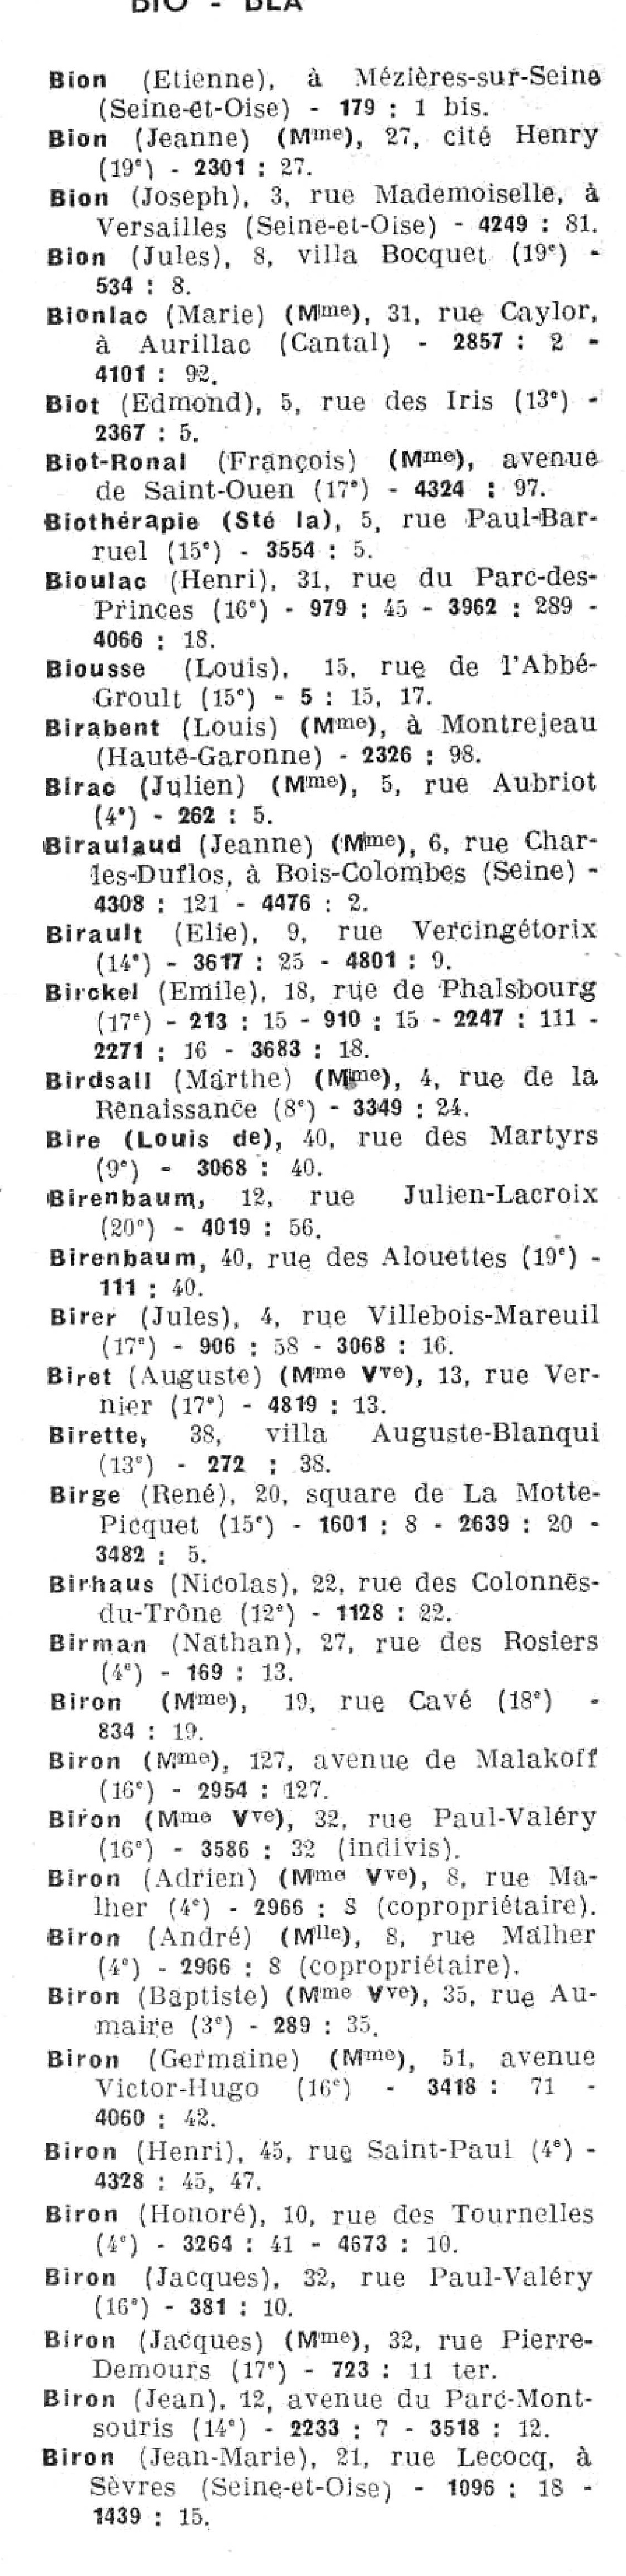

In [57]:
# Image de départ :
path_img = os.path.join(parent_dir, "sample_1951/crops_colonnes_jpg/d-046_col1.jpg")
display(Image(filename=path_img, width=300))

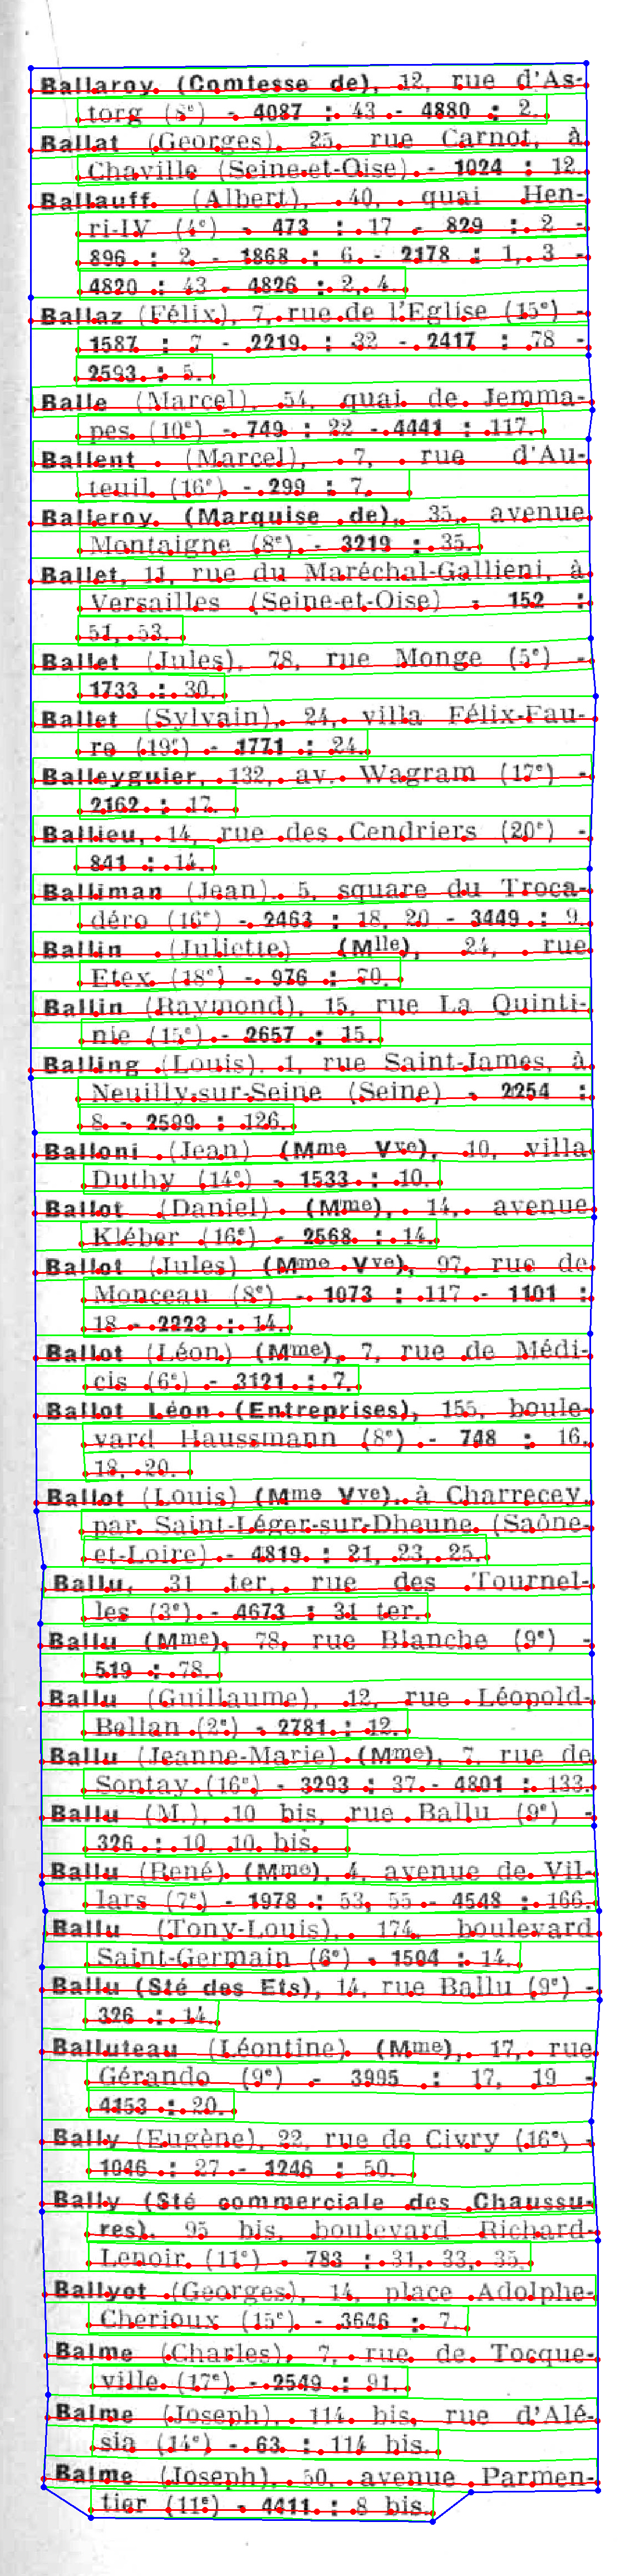

In [58]:
# Données de sorties : 1. lignes reconnues :
path_img_l = os.path.join(parent_dir, "sample_1951/pero/d-021_col1.out.png")
display(Image(filename=path_img_l, width=300))

In [59]:
# Données de sorties : 2. Texte extrait :
# Note : il n'y a pas de saut de ligne entre chaque ligne de texte dans le fichier original, c'est du à l'affichage du notebook
path_text = os.path.join(parent_dir, "sample_1951/pero/d-021_col1.out.txt")
with open(path_text, "r") as texte:
    for ligne in texte:
        print(ligne)

Ballaroy (Comtesse de), 12, rue d'As-

torg (8“) - 4087 ; 43 - 4880 : 2.

Ballat (Georges), 25, rue Carnot, à

Chaville (Seine-et-Oise) . 1024 : 12.

Ballauff (Albert), 40. quai Hen-

ri-IV (4) - 473 : 17 . 829 : 2 .

896 : 2 . 1868 : 6 . 2178 : 1, 3 „

4820 : 43 - 4826 : 2, 4.

Ballaz (Félix), 7. rue de l'Eglise (15°) -

1587 : 7 - 2219 : 32 - 2417 : 78 .

2593 : 5.

Balle (Marcel), 54, quai de Jemma-

pes (105) - 749 : 22 - 4441 : 117.

Ballent (Marcel), 7, rue d'Au-

teuil (16°) - 299 i 7.

Balleroy (Marquise de), 35, avenue

Montaigne (8) - 3219 : 35.

Ballet, 11, rue du Maréchal-Gallieni, à

Versailles (Seine-et-Oise) - 152 :

51, 53.

Ballet (Jules). 78, rue Monge (55) .

1733 ; 30.

Ballet (Sylvain), 24, villa Félix-Fau-

re (19) - 1771 : 24.

Balleyguler, 132, av. Wagram (17e) .

2162 : 17.

Ballieu, 14, rue des Cendriers (205) -

841 : 14.

Balliman (Jean). 5, square du Troca-

déro (165) - 2463 : 18. 20 - 3449 : 9.

Ballin (Juliette) (Mlle), 24, rue

Etex (18 ) - 976 : 70.

B